In [3]:
import pandas as pd
import os

#đọc file 
df = pd.read_csv('C:/Users/BICH THUY/DATA_A/updateData_CategoryProduct.csv')

#hiển thị 5 hàng đầu tiên của DataFrame df (check định dạng/ndung)
df.head()

Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        46251  08/09/2020 09:38:00      Electronics             12         3   
1        46251  05/03/2022 12:56:00             Home            468         4   
2        46251  23/05/2022 18:18:00             Home            288         2   
3        46251  12/11/2020 13:13:00         Clothing            196         1   
4        13593  27/11/2020 17:55:00             Home            449         1   

   Customer Age  Gender  
0            37    Male  
1            37    Male  
2            37    Male  
3            37    Male  
4            49  Female

In [39]:
# Thống kế tổng quan theo từng nhóm Gender và Tổng chi tiêu   
#groupby('Gender'): chia dataset và thực hiện các phép tính thành 2 nhóm Gtinh
#agg(): thuc hien cac phep toan thong ke cua nhieu cot du lieu khac nhau (da duoc GROUPBY)
#Bang chua cac GTri thong ke theo dong tuong ung

gender_summary = df.groupby('Gender').agg(total_count=('Customer ID','size'), #tong so KH theo gender
        min_amount=('Product Price', 'min'), #GTNN(Total Price) theo Gender
        max_amount=('Product Price', 'max'), #GTLN(Total Price) theo Gender 
        median_amount=('Product Price','median'), #GT trung vi tong chi tien theo Gender
        total_amount=('Product Price','sum'),  #tong tien chi tieu tat ca KH theo Gender
        average_amount =('Product Price','mean'), #trung bình tiền chi tiêu theo Gender
        )
print("\nThống kế tổng quan theo từng nhóm Gender và Tổng chi tiêu:")
print(gender_summary)


Thống kế tổng quan theo từng nhóm Gender và Tổng chi tiêu:
        total_count  min_amount  max_amount  median_amount  total_amount  \
Gender                                                                     
Female       125560          10         500          254.0      31959573   
Male         124440          10         500          255.0      31705305   

        average_amount  
Gender                  
Female      254.536262  
Male        254.783872  


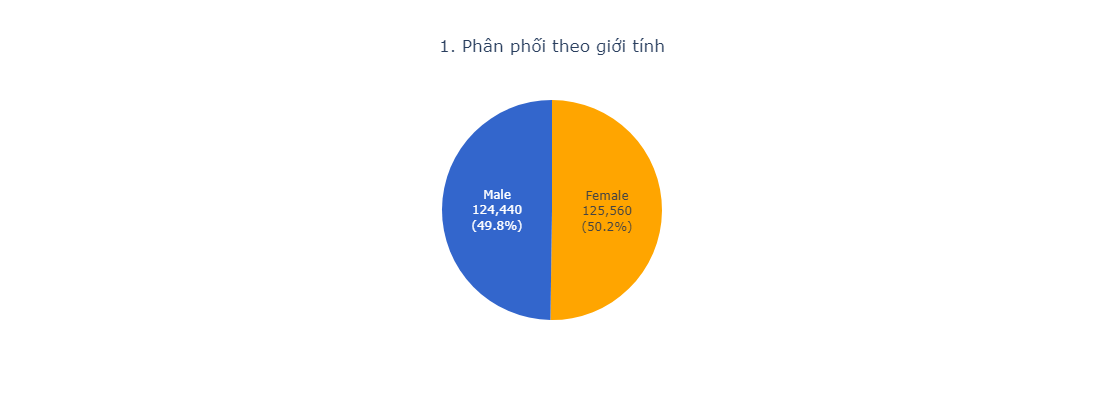

In [41]:

##1. Gender distribution (Phân tích và trực quan hóa phân phối giới tính)

#cai dat thu vien
import plotly.express as px

gender_count = df['Gender'].value_counts() #Tính toán Sluong KHang theo Gioi Tinh (Age)

#Tạo biểu đồ Pie Chart
#(px) là thư viện plotly.express dùng vẽ Pie Chart 
fig1 = px.pie(values=gender_count, 
              names=gender_count.index, 
              color=gender_count.index,
              color_discrete_map={
                  'Female':'#FFA500', 
                   'Male':'#3366CC'
              },
              title = '1. Phân phối theo giới tính')

# điều chỉnh văn bản hiển thị trong biểu đồ tròn
fig1.update_traces(textposition='inside', textinfo='text', 
                   texttemplate='%{label}<br>%{value}<br>(%{percent})')

# điều chỉnh kích thước và ẩn chú giải
fig1.update_layout(title={'x': 0.5, 'y': 0.9},
                   width=400, height=400, showlegend=False)
# hiển thị biểu đồ
fig1.show()
# lưu biểu đồ dưới dạng hình ảnh 
##fig1.write_image("Gender_Distribution.png")

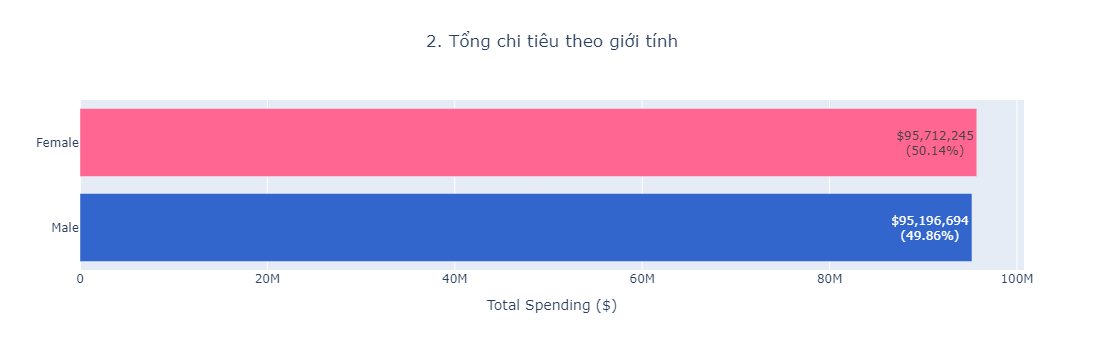

In [35]:
# Import thư viện
import pandas as pd
import plotly.express as px # Mã vẽ biểu đồ không thay đổi, chỉ update data từ gender_summary

# Tính toán tổng chi tiêu (total_spending) cho từng dòng dữ liệu
df['Total Spending'] = df['Product Price'] * df['Quantity']

# Tính tổng chi tiêu theo giới tính
gender_summary = df.groupby('Gender', as_index=False).agg({'Total Spending': 'sum'})

# Tính phần trăm tổng chi tiêu theo giới tính
sum_spending = gender_summary['Total Spending'].sum()
gender_summary['Total Spending Percentage'] = (gender_summary['Total Spending'] / sum_spending * 100).round(2)

# Vẽ biểu đồ bar
fig2 = px.bar(
    gender_summary, 
    x='Total Spending', 
    y='Gender',
    orientation='h',
    color='Gender',
    color_discrete_map={'Female': '#FF6692', 'Male': '#3366CC'},
    title='2. Tổng chi tiêu theo giới tính',
    text=gender_summary.apply(
        lambda x: f"${x['Total Spending']:,}<br>({x['Total Spending Percentage']:.2f}%)", 
        axis=1
    ),
    labels={'Total Spending': 'Total Spending ($)'}
)

# Tùy chỉnh layout
fig2.update_layout(
    title={'x': 0.5, 'y': 0.9},
    yaxis_title=None, 
    width=550, 
    height=350, 
    showlegend=False
)
# Hiển thị biểu đồ
fig2.show()

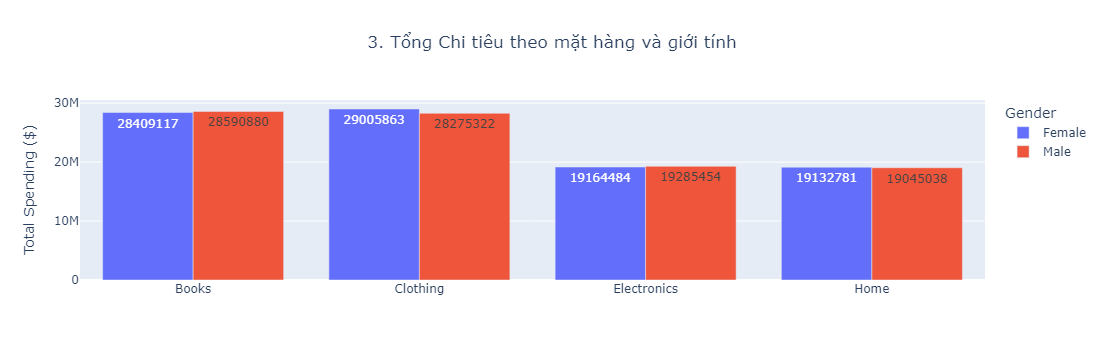

In [35]:
#PTICH TỔNG CHI TIÊU THEO MẶT HÀNG VÀ GIỚI TÍNH
import plotly.express as px
# Tính toán tổng chi tiêu (total_spending) cho từng dòng dữ liệu
df['Total Spending'] = df['Product Price'] * df['Quantity']
# Tính tổng chi tiêu cho từng sản phẩm theo giới tính
gender_category_summary = df.groupby(['Gender', 'Product Category'], as_index=False).agg({'Total Spending': 'sum'})

# Tính tổng chi tiêu của từng giới tính
gender_spending_summary = gender_category_summary.groupby('Gender', as_index=False).agg({'Total Spending': 'sum'})

# Vẽ biểu đồ so sánh chi tiêu theo sản phẩm và giới tính
fig3 = px.bar(
    gender_category_summary, 
    x='Product Category', 
    y='Total Spending',
    color='Gender',
    title="3. Tổng Chi tiêu theo mặt hàng và giới tính",
    labels={'Total Spending': 'Total Spending ($)', 'Product Category': 'Product Category'},
    barmode='group',  # Hiển thị các cột cho từng giới tính
    text='Total Spending'  # Hiển thị giá trị chi tiêu trên từng cột
)

# Cập nhật layout cho biểu đồ
fig3.update_layout(
    xaxis_title=None,
    yaxis_title='Total Spending ($)', 
    title={'x': 0.5, 'y': 0.9}, 
    height=400, 
    showlegend=True
)
# Hiển thị biểu đồ
fig3.show()

In [91]:
print(female_df.head()) 
print(female_df['Is Holiday'].unique())  # Kiểm tra giá trị của cột 'Is Holiday'

   Customer ID       Purchase Date Product Category  Product Price  Quantity  \
4        13593 2020-11-27 17:55:00             Home            449         1   
5        13593 2023-03-07 14:17:00             Home            250         4   
6        13593 2023-04-15 03:02:00      Electronics             73         1   
7        13593 2021-03-27 21:23:00            Books            337         2   
8        13593 2020-05-05 20:14:00         Clothing            182         2   

   Customer Age  Gender  Total Spending  Month  Is Holiday  
4            49  Female             449     11       False  
5            49  Female            1000      3       False  
6            49  Female              73      4       False  
7            49  Female             674      3       False  
8            49  Female             364      5       False  
[False  True]


#TRENDS ABOUT AGE

In [7]:
# sử dụng np để tạo mảng 
import numpy as np

# Định nghĩa các nhóm tuổi
age_bins = [0, 18, 29, 39, 49, 59, 70, np.inf]  # Bao gồm 7 gtrị từ 0 đến gtri vô cùng
# gắn nhãn cho các nhóm tuổi trong age_bins
age_labels = ['0-18', '18-29', '30-39', '40-49', '50-59', '60-70', '70+'] # Đúng 6 nhãn

# Thêm cột "Age Group" vào DataFrame df cho biết nhóm tuổi mỗi KH thuộc về
#pd.cut: hàm pandas chia data theo các nhóm tuổi thuộc bins
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels) 

# ktra và độ tuổi KH xếp theo thứ tự giảm dần
df[['Customer ID','Customer Age','Age Group']].sort_values('Customer Age', ascending=False)

# Ktrcác gtri thiếu missing values trong "Age Group" -> Đã xử lý ở bước tiền xử lý: Ko lỗi
#missing_age_groups = df[df['Age Group'].isnull()]
#print(f"Số giá trị thiếu trong 'Age Group': {len(missing_age_groups)}")

Customer ID  Customer Age Age Group
109802        38123            70     60-70
8996          28355            70     60-70
115007        20140            70     60-70
115008        20140            70     60-70
42599         34705            70     60-70
...             ...           ...       ...
159476        35947            18      0-18
159475        35947            18      0-18
159474        35947            18      0-18
159473        35947            18      0-18
22907         49598            18      0-18

[250000 rows x 3 columns]

In [59]:
#XỬ LÝ LỖI TÍNH TOÁN % SAI NHÓM TUỔI <18
## Kiểm tra các giá trị ngoài khoảng dự kiến (dưới 18 hoặc trên 70)
df = df[(df['Customer Age'] >= 18) & (df['Customer Age'] <= 70)]

# Đếm số lượng khách hàng trong mỗi nhóm tuổi
age_bins = [0, 18, 29, 39, 49, 59, 70, np.inf]
age_labels = ['0-18', '18-29', '30-39', '40-49', '50-59', '60-70', '70+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels)

# Kiểm tra giá trị nhỏ hơn 18 hoặc thiếu
print(df[df['Customer Age'] < 18])
print(df['Customer Age'].isnull().sum())

print(df['Age Group'].value_counts()) #Lỗi đếm sai sluong group 18t do đếm gtri NaN, vì dataset ko có KH dưới 18t nhưng tỷ lệ % lại 2,05%
##XỬ LÝ
# Đảm bảo cột 'Age Group' trong df được phân loại đúng theo age_labels
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_labels, ordered=True)

# Lọc bỏ dữ liệu không hợp lệ hoặc các nhóm không liên quan như '<18'
df_filtered = df[df['Age Group'].notnull() & (df['Age Group'] != '0-18')]  # Loại bỏ nhóm '<18' rõ ràng

# Đếm tổng số khách hàng sau khi lọc
total_customers = df_filtered['Age Group'].value_counts().sum()

# Đếm số lượng người trong mỗi nhóm độ tuổi
age_group_count = df_filtered['Age Group'].value_counts().sort_index().reset_index(name='Count')
age_group_count.rename(columns={'index': 'Age Group'}, inplace=True)  # Đổi tên cột cho dễ hiểu

# Tính tỷ lệ phần trăm số lượng khách hàng trong mỗi nhóm tuổi từ age_group_count
age_group_count['Percentage'] = (age_group_count['Count'] / total_customers) * 100

# In kết quả
print(age_group_count)

Empty DataFrame
Columns: [Customer ID, Purchase Date, Product Category, Product Price, Quantity, Customer Age, Gender, Total Spending, Age Group]
Index: []
0
Age Group
18-29    52375
60-70    52082
40-49    47444
50-59    46581
30-39    46515
0-18      5003
70+          0
Name: count, dtype: int64
  Age Group  Count  Percentage
0      0-18      0    0.000000
1     18-29  52375   21.377813
2     30-39  46515   18.985947
3     40-49  47444   19.365135
4     50-59  46581   19.012886
5     60-70  52082   21.258219
6       70+      0    0.000000


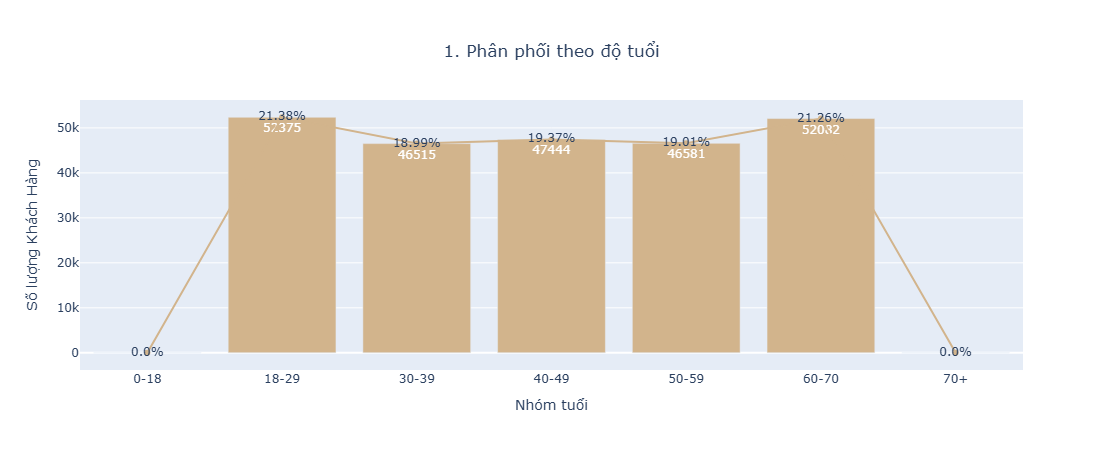

In [9]:
## 1. PHÂN PHỐI ĐỘ TUỔI THEO ĐỘ TUỔI

# Đảm bảo cột 'Age Group' trong df được phân loại đúng theo age_labels
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_labels, ordered=True)

# Lọc bỏ dữ liệu không hợp lệ hoặc các nhóm không liên quan như '<18'
df_filtered = df[df['Age Group'].notnull() & (df['Age Group'] != '0-18')]  # Loại bỏ nhóm '<18' rõ ràng

# Đếm tổng số khách hàng sau khi lọc
total_customers = df_filtered['Age Group'].value_counts().sum()

# Đếm số lượng người trong mỗi nhóm độ tuổi
age_group_count = df_filtered['Age Group'].value_counts().sort_index().reset_index(name='Count')
age_group_count.rename(columns={'index': 'Age Group'}, inplace=True)  # Đổi tên cột cho dễ hiểu

# Tính tỷ lệ phần trăm số lượng khách hàng trong mỗi nhóm tuổi từ age_group_count
age_group_count['Percentage'] = (age_group_count['Count'] / total_customers) * 100

# Thêm cột hiển thị tỷ lệ phần trăm dạng chuỗi (thêm ký hiệu %)
age_group_count['Percentage'] = age_group_count['Percentage'].round(2).astype(str) + '%'

# In kết quả
#print(age_group_count)

# Vẽ Line chart + bars
import plotly.express as px

fig4 = px.line(age_group_count, 
               x='Age Group', 
               y='Count',
               title='1. Phân phối theo độ tuổi',
               markers=True,
               text='Percentage',
               labels={'Count': 'Số lượng Khách Hàng'})

# Layout design
fig4.update_traces(line=dict(color='#D2B48C'))  # Đổi màu đường line thành nâu nhạt
fig4.update_traces(marker=dict(color='#D2B48C'), selector=dict(type='scatter'))  # Đổi màu marker

fig4.add_bar(x=age_group_count['Age Group'], 
             y=age_group_count['Count'], 
             text=age_group_count['Count'], 
             textposition='inside', 
             name='Count', 
             marker=dict(color='#D2B48C'))

fig4.update_traces(textfont_color='white', selector=dict(type='bar'))  # Đổi màu chữ hiển thị trên bar
fig4.update_layout(title={'x': 0.5, 'y': 0.9},  # Căn giữa tiêu đề
                   xaxis_title='Nhóm tuổi',
                   yaxis_title='Số lượng Khách Hàng',
                   width=750, height=450,  # Giảm kích thước biểu đồ xuống 85%
                   showlegend=False)

fig4.show()

In [99]:
# Kiểm tra xem có giá trị missing (NaN) trong các cột cần thiết không
print(df[['Product Price', 'Quantity', 'Age Group', 'Product Category']].isnull().sum())


Product Price       0
Quantity            0
Age Group           0
Product Category    0
dtype: int64


In [101]:
print(len(df))  # Số dòng của DataFrame
print(len(df['Product Price']))  # Độ dài của cột 'Product Price'
print(len(df['Quantity']))  # Độ dài của cột 'Quantity'

250000
250000
250000


In [93]:
# Kiểm tra chiều dữ liệu DataFrame và cột cần gán
print("Số lượng dòng trong DataFrame:", len(df))
print("Số lượng giá trị trong Age Group:", len(pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels)))

# Nếu không khớp, kiểm tra dữ liệu không phù hợp
invalid_rows = df[pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels).isnull()]
print("Các dòng không khớp với bins:", invalid_rows)
print("Số lượng dòng sau khi loại bỏ NaN:", len(df))
# Kiểm tra giá trị NaN trong cột 'Age Group'
print("Số giá trị NaN trong 'Age Group':", df['Age Group'].isnull().sum())
print("Số lượng dòng trong DataFrame:", len(df))
print("Số lượng giá trị trong cột 'Customer Age':", df['Customer Age'].notnull().sum())

Số lượng dòng trong DataFrame: 250000
Số lượng giá trị trong Age Group: 250000
Các dòng không khớp với bins: Empty DataFrame
Columns: [Customer ID, Purchase Date, Product Category, Product Price, Quantity, Customer Age, Gender, Total Spending, Age Group]
Index: []
Số lượng dòng sau khi loại bỏ NaN: 250000
Số giá trị NaN trong 'Age Group': 0
Số lượng dòng trong DataFrame: 250000
Số lượng giá trị trong cột 'Customer Age': 250000


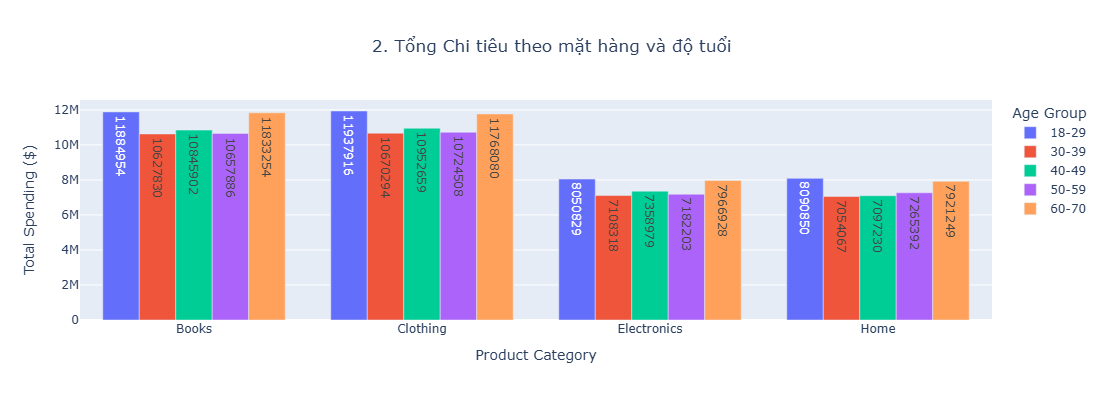

In [11]:
#2. Tổng Chi tiêu theo mặt hàng và độ tuổi
import pandas as pd
import plotly.express as px

# Giả sử df là DataFrame của bạn
# Kiểm tra và tạo cột 'Total Spending' nếu chưa tồn tại
if 'Total Spending' not in df.columns:
    # Kiểm tra xem các cột 'Product Price' và 'Quantity' có giá trị hợp lệ không
    if 'Product Price' in df.columns and 'Quantity' in df.columns:
        df['Total Spending'] = df['Product Price'].fillna(0) * df['Quantity'].fillna(0)
    else:
        raise ValueError("Cột 'Product Price' hoặc 'Quantity' không tồn tại trong DataFrame.")

# Lọc DataFrame để chỉ giữ lại các khách hàng từ 18 tuổi trở lên
df = df[df['Age Group'].isin(['18-29', '30-39', '40-49', '50-59', '60-70', '70+'])]

# Xử lý dữ liệu trước khi nhóm
# Thêm giá trị "Unknown" vào các cột category nếu chưa có
if 'Age Group' in df.columns and df['Age Group'].dtype.name == 'category':
    df['Age Group'] = df['Age Group'].cat.add_categories(['Unknown'])
    df['Age Group'] = df['Age Group'].fillna("Unknown")  # Gán lại giá trị cho cột

if 'Product Category' in df.columns and df['Product Category'].dtype.name == 'category':
    df['Product Category'] = df['Product Category'].cat.add_categories(['Unknown'])
    df['Product Category'] = df['Product Category'].fillna("Unknown")  # Gán lại giá trị cho cột

# Chuyển đổi các cột thành kiểu chuỗi nếu cần -> Tránh lỗi khi nhóm
df['Age Group'] = df['Age Group'].astype(str)
df['Product Category'] = df['Product Category'].astype(str)

# Tính tổng chi tiêu cho từng sản phẩm theo độ tuổi
age_category_summary = df.groupby(['Age Group', 'Product Category'], as_index=False).agg({'Total Spending': 'sum'})

# Lọc các nhóm tuổi không có chi tiêu (Total Spending = 0)
age_category_summary = age_category_summary[age_category_summary['Total Spending'] > 0]
# Kiểm tra xem có nhóm tuổi nào không có chi tiêu không
#print(age_category_summary)  # In ra để kiểm tra

# Tính tổng chi tiêu của từng độ tuổi
age_spending_summary = age_category_summary.groupby('Age Group', as_index=False).agg({'Total Spending': 'sum'})

# Vẽ biểu đồ so sánh chi tiêu theo sản phẩm và độ tuổi
fig5 = px.bar(
    age_category_summary, 
    x='Product Category', 
    y='Total Spending',
    color='Age Group',  # Nhóm màu theo độ tuổi
    title="2. Tổng Chi tiêu theo mặt hàng và độ tuổi",
    labels={'Total Spending': 'Total Spending ($)', 'Product Category': 'Product Category'},
    barmode='group',  # Hiển thị các cột cho từng độ tuổi
    text='Total Spending'  # Hiển thị giá trị chi tiêu trên từng cột
)

# Cập nhật layout cho biểu đồ
fig5.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Total Spending ($)', 
    title={'x': 0.5, 'y': 0.9}, 
    height=400, 
    showlegend=True
)

# Hiển thị biểu đồ
fig5.show()

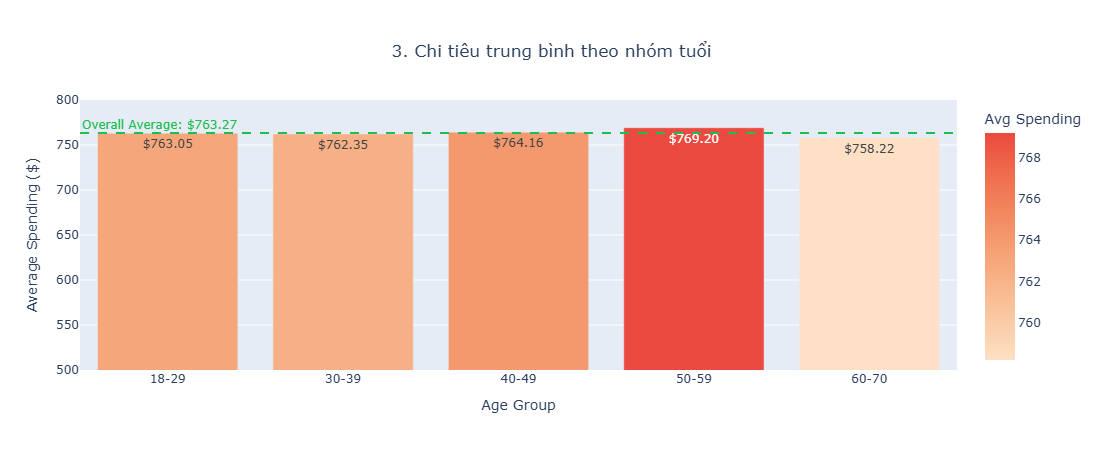

In [17]:
#3.PTICH CHI TIÊU TRUNG BÌNH THEO NHÓM TUỔI (Average spending by age group)

# Tính toán tổng chi tiêu (total_spending) cho từng dòng dữ liệu
df['Total Spending'] = df['Product Price'] * df['Quantity']
# calculate overall and average of total spending for each age group
overall_avg_spending = df ['Total Spending'].mean()
#print(overall_avg_spending)

#tính trung bình chi tiêu theo nhóm tuổi 
avg_spending_age_group = df.groupby(['Age Group'])['Total Spending'].mean().reset_index(name='Avg Spending')

#vẽ biểu đổ
fig6 = px.bar(avg_spending_age_group, x= 'Age Group', y= 'Avg Spending', 
              color = 'Avg Spending',
              color_continuous_scale= "peach", 
              category_orders={'Age Group': age_labels},
              title='3. Chi tiêu trung bình theo nhóm tuổi',
              text= [f"${value:.2f}" for value in avg_spending_age_group['Avg Spending']],
              hover_data={'Age Group':True, 'Avg Spending':"${:.2f}"})

fig6.update_traces(hovertemplate="Age Group: %{x}<br>"
                                 "Average Spending: %{y:$,.2f}")
fig6.add_hline(y=overall_avg_spending, line_dash="dash", line_color="#1CBE4F",
               annotation_text=f'Overall Average: ${overall_avg_spending:.2f}',
               annotation_font_color="#1CBE4F",
               annotation_position="top left")

fig6.update_layout(title={'x': 0.5, 'y': 0.9},
                   width=700, height=450,
                   xaxis_title= 'Age Group', 
                   yaxis_title= 'Average Spending ($)',
                   yaxis=dict(range=[500, 800],  # Set range from 400 to 800
                              tick0=500,  # Set starting tick at 400
                              dtick=50),  # Set interval between ticks
                   showlegend=False)
# Hiển thị biểu đồ
fig6.show()

#PHÂN TÍCH CHI TIÊU TRUNG BÌNH THEO MẶT HÀNG VÀ NHÓM TUỔI (Average Spending by PCategory and Age group)

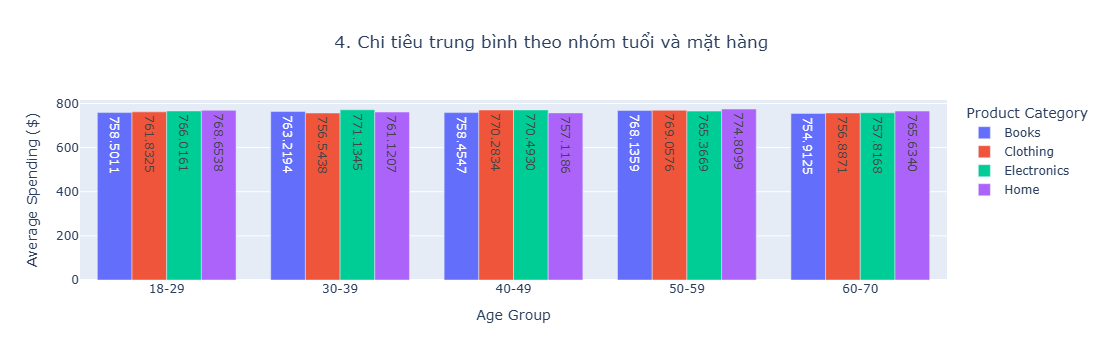

In [34]:
#PHÂN TÍCH CHI TIÊU TRUNG BÌNH THEO MẶT HÀNG VÀ NHÓM TUỔI (Average Spending by PCategory and Age group)
import pandas as pd
import plotly.express as px

# Tính trung bình chi tiêu theo nhóm tuổi và nhóm sản phẩm
avg_spending_age_group_category = df.groupby(['Age Group', 'Product Category'])['Total Spending'].mean().reset_index(name='Avg Spending')

# Tính trung bình chi tiêu tổng thể
overall_avg_spending = df['Total Spending'].mean()

# Vẽ biểu đồ so sánh chi tiêu trung bình theo nhóm tuổi và sản phẩm
fig7 = px.bar(
    avg_spending_age_group_category, 
    x='Age Group',  # Trục X là nhóm tuổi
    y='Avg Spending',  # Trục Y là chi tiêu trung bình
    color='Product Category',  # Nhóm màu theo loại sản phẩm
    title="4. Chi tiêu trung bình theo nhóm tuổi và mặt hàng",
    labels={'Avg Spending': 'Average Spending ($)', 'Age Group': 'Age Group'},
    barmode='group',  # Hiển thị các cột cho từng loại sản phẩm
    text_auto='.4f'  # Định dạng hiển thị giá trị với 2 chữ số thập phân
)

# Cập nhật layout cho biểu đồ
fig7.update_layout(
    xaxis_title='Age Group',  # Tiêu đề trục X là 'Age Group'
    yaxis_title='Average Spending ($)',  # Tiêu đề trục Y là 'Average Spending'
    title={'x': 0.5, 'y': 0.9}, 
    height=400, 
    showlegend=True
)
# Hiển thị biểu đồ
fig7.show()


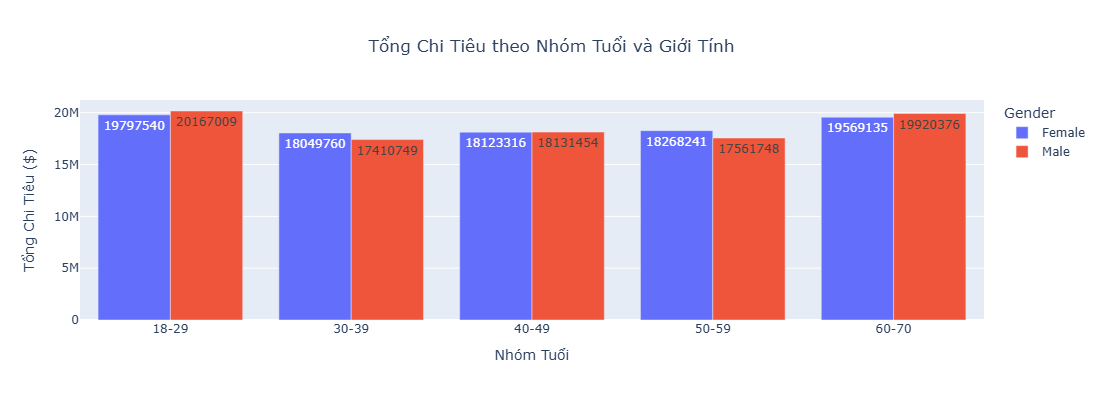

In [13]:
#PTICH TỔNG CHI TIÊU THEO NHÓM TUỔI VÀ GIỚI TÍNH (kết hợp 2 thuộc tính)
import pandas as pd
import plotly.express as px

# Giả sử df đã có các cột 'Total Spending', 'Age Group' và 'Gender'

# Nhóm dữ liệu theo 'Age Group' và 'Gender', sau đó tính tổng chi tiêu
total_spending_by_age_gender = df.groupby(['Age Group', 'Gender'], as_index=False)['Total Spending'].sum()

# Vẽ biểu đồ tổng chi tiêu theo nhóm tuổi và giới tính
fig8 = px.bar(
    total_spending_by_age_gender, 
    x='Age Group', 
    y='Total Spending',
    color='Gender',  # Nhóm màu theo giới tính
    barmode='group',  # Hiển thị các cột cho từng giới tính
    title='Tổng Chi Tiêu theo Nhóm Tuổi và Giới Tính',
    labels={'Total Spending': 'Tổng Chi Tiêu ($)', 'Age Group': 'Nhóm Tuổi'},
    text='Total Spending'  # Hiển thị giá trị chi tiêu trên từng cột
)

# Cập nhật layout cho biểu đồ
fig8.update_layout(
    xaxis_title='Nhóm Tuổi',
    yaxis_title='Tổng Chi Tiêu ($)', 
    title={'x': 0.5, 'y': 0.9}, 
    height=400, 
    showlegend=True
)
# Hiển thị biểu đồ
fig8.show()

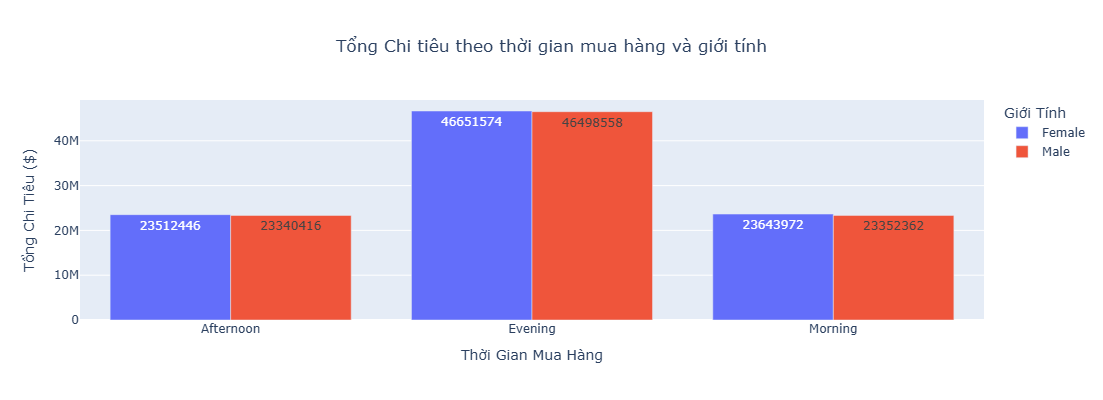

In [15]:
#phân tích tổng chi tiêu mua hàng theo thời gian mua hàng vào buổi sáng/chiều tối từ cột 'Purchase Date' và theo giới tính 'Gender' 
#BarChar
import plotly.express as px

# Chuyển đổi 'Purchase Date' thành kiểu datetime nếu chưa phải
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M:%S')

# Tạo cột 'Time of Day' phân loại buổi sáng và chiều tối
def classify_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'  # Buổi sáng
    elif 12 <= hour < 18:
        return 'Afternoon'  # Buổi chiều
    else:
        return 'Evening'  # Buổi tối

# Áp dụng hàm để phân loại thời gian từ cột 'Purchase Date'
df['Time of Day'] = df['Purchase Date'].dt.hour.apply(classify_time_of_day)

#2.
# Nhóm dữ liệu theo giới tính và phân loại thời gian
time_gender_spending = df.groupby(['Gender', 'Time of Day']).agg({'Total Spending': 'sum', 'Purchase Date': 'count'}).reset_index()

# Nếu bạn muốn tính số lượng mua hàng thay vì tổng chi tiêu, sử dụng 'Purchase Date' đếm số bản ghi:
# time_gender_spending = df.groupby(['Gender', 'Time of Day']).size().reset_index(name='Purchase Count')

#3.Vẽ biểu đồ cột nhóm theo thời gian và giới tính
fig9 = px.bar(time_gender_spending, 
             x='Time of Day', 
             y='Total Spending',  # Hoặc 'Purchase Count' nếu bạn phân tích số lượng mua hàng
             color='Gender', 
             title='Tổng Chi tiêu theo thời gian mua hàng và giới tính',
             labels={'Total Spending': 'Tổng Chi Tiêu ($)', 'Time of Day': 'Thời Gian Mua Hàng', 'Gender': 'Giới Tính'},
             barmode='group',  # Hiển thị các cột cho từng giới tính
             text='Total Spending'  # Hiển thị giá trị chi tiêu trên từng cột
)
# Cập nhật layout cho biểu đồ
fig9.update_layout(
    xaxis_title='Thời Gian Mua Hàng', 
    yaxis_title='Tổng Chi Tiêu ($)', 
    title={'x': 0.5, 'y': 0.9}, 
    height=400, 
    showlegend=True
)

# Hiển thị biểu đồ
fig9.show()

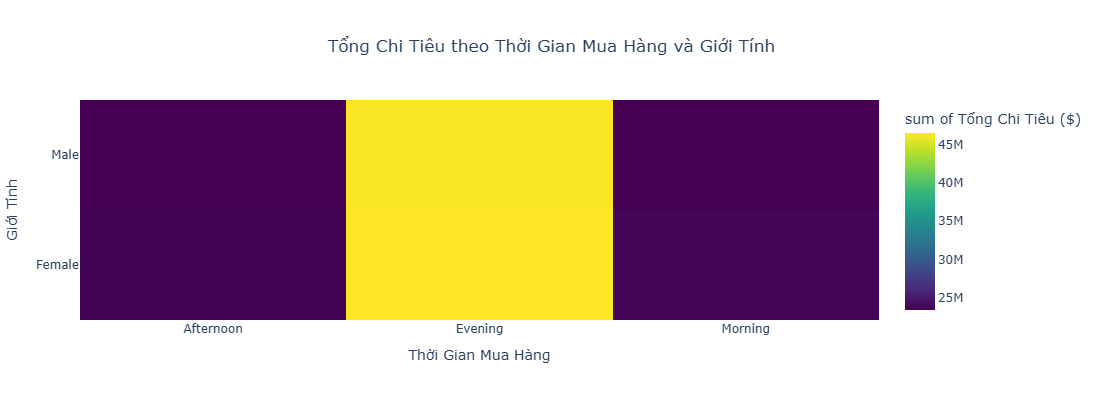

In [19]:
#phân tích tổng chi tiêu mua hàng theo thời gian mua hàng vào buổi sáng/chiều tối từ cột 'Purchase Date' và theo giới tính 'Gender' 
#HEATMAP
import plotly.express as px
import pandas as pd

# Chuyển đổi 'Purchase Date' thành kiểu datetime nếu chưa phải
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M:%S')

# Tạo cột 'Time of Day' phân loại buổi sáng và chiều tối
def classify_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'  # Buổi sáng
    elif 12 <= hour < 18:
        return 'Afternoon'  # Buổi chiều
    else:
        return 'Evening'  # Buổi tối

# Áp dụng hàm để phân loại thời gian từ cột 'Purchase Date'
df['Time of Day'] = df['Purchase Date'].dt.hour.apply(classify_time_of_day)

# Nhóm dữ liệu theo giới tính và phân loại thời gian, tính tổng chi tiêu
time_gender_spending = df.groupby(['Gender', 'Time of Day']).agg({'Total Spending': 'sum', 'Purchase Date': 'count'}).reset_index()

# Sử dụng biểu đồ heatmap
fig10 = px.density_heatmap(time_gender_spending, 
                           x='Time of Day', 
                           y='Gender', 
                           z='Total Spending',  # Chọn 'Total Spending' làm giá trị cường độ
                           color_continuous_scale='Viridis',  # Màu sắc của heatmap
                           title='Tổng Chi Tiêu theo Thời Gian Mua Hàng và Giới Tính',
                           labels={'Total Spending': 'Tổng Chi Tiêu ($)', 'Time of Day': 'Thời Gian Mua Hàng', 'Gender': 'Giới Tính'}
)

# Cập nhật layout cho biểu đồ
fig10.update_layout(
    title={'x': 0.5, 'y': 0.9},
    xaxis_title='Thời Gian Mua Hàng', 
    yaxis_title='Giới Tính', 
    height=400,
    showlegend=False
)

# Hiển thị biểu đồ
fig10.show()
#HEATMAP trong t.hop Tổng chi tiêu này chưa phát huy tối đa công dụng vì dữ liệu "TOTAL SPENDING" 
#ko có sự phân bố rõ ràng, dữ liệu không có cường độ. Thử 'Average Spending" sẽ có ý nghĩa hơn

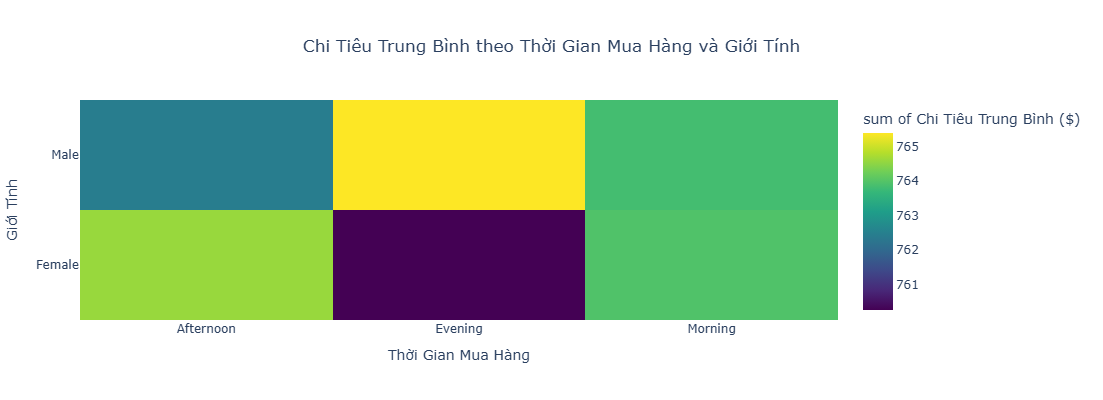

In [21]:
#phân tích CHI TIÊU TRUNG BÌNH theo thời gian mua hàng vào buổi sáng/chiều tối từ cột 'Purchase Date' và theo giới tính 'Gender' 
import plotly.express as px
import pandas as pd

# Chuyển đổi 'Purchase Date' thành kiểu datetime nếu chưa phải
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M:%S')

# Tạo cột 'Time of Day' phân loại buổi sáng, chiều, tối
def classify_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'  # Buổi sáng
    elif 12 <= hour < 18:
        return 'Afternoon'  # Buổi chiều
    else:
        return 'Evening'  # Buổi tối

# Áp dụng hàm để phân loại thời gian từ cột 'Purchase Date'
df['Time of Day'] = df['Purchase Date'].dt.hour.apply(classify_time_of_day)

# Nhóm dữ liệu theo giới tính và phân loại thời gian, tính chi tiêu trung bình
time_gender_avg_spending = df.groupby(['Gender', 'Time of Day'])['Total Spending'].mean() #tính chi tiêu trung bình

# Chuyển kết quả thành DataFrame với các cột thông thường
time_gender_avg_spending = time_gender_avg_spending.reset_index()  # Đưa index trở lại thành cột
time_gender_avg_spending = time_gender_avg_spending.rename(columns={'Total Spending': 'Average Spending'})  # Đổi tên cột

# Vẽ biểu đồ heatmap
fig11_heatmap = px.density_heatmap(time_gender_avg_spending, 
                                 x='Time of Day', 
                                 y='Gender', 
                                 z='Average Spending',  # Sử dụng 'Average Spending' làm giá trị cường độ
                                 color_continuous_scale='Viridis',  # Màu sắc của heatmap
                                 title='Chi Tiêu Trung Bình theo Thời Gian Mua Hàng và Giới Tính',
                                 labels={'Average Spending': 'Chi Tiêu Trung Bình ($)', 'Time of Day': 'Thời Gian Mua Hàng', 'Gender': 'Giới Tính'}
)

# Cập nhật layout cho biểu đồ
fig11_heatmap.update_layout(
    title={'x': 0.5, 'y': 0.9},
    xaxis_title='Thời Gian Mua Hàng', 
    yaxis_title='Giới Tính', 
    height=400,
    showlegend=False
)
# Hiển thị biểu đồ
fig11_heatmap.show()

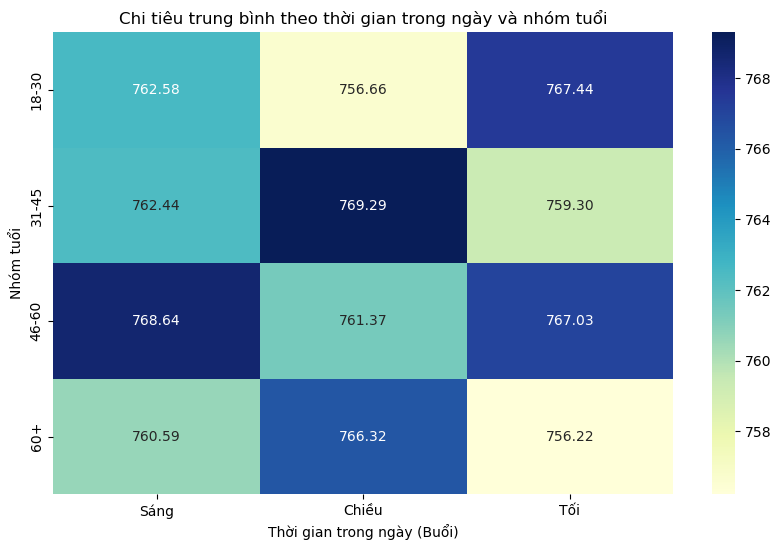

In [40]:
#Phân Tích chi tiêu trung bình thời gian trong ngày (buổi) và nhóm tuổi 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo rằng cột 'Purchase Date' có định dạng datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M:%S')

# Tạo một cột mới để phân loại thời gian trong ngày (sáng, chiều, tối)
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Sáng'
    elif 12 <= hour < 18:
        return 'Chiều'
    else:
        return 'Tối'

df['Time of Day'] = df['Purchase Date'].dt.hour.apply(get_time_of_day)

# Kiểm tra dữ liệu
#print(df.head())
#2. Tạo cột nhóm tuổi
def get_age_group(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 31 <= age <= 45:
        return '31-45'
    elif 46 <= age <= 60:
        return '46-60'
    else:
        return '60+'

df['Age Group'] = df['Customer Age'].apply(get_age_group)

# Tính chi tiêu trung bình theo nhóm tuổi và thời gian trong ngày
avg_spending = df.groupby(['Age Group', 'Time of Day'])['Total Spending'].mean().unstack()
# Kiểm tra kết quả
#print(avg_spending)

# Sắp xếp lại các cột theo thứ tự mong muốn
avg_spending = avg_spending[['Sáng', 'Chiều', 'Tối']]

#3.Tạo biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(avg_spending, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)

# Tinh chỉnh biểu đồ
plt.title('Chi tiêu trung bình theo thời gian trong ngày và nhóm tuổi')
plt.xlabel('Thời gian trong ngày (Buổi)')
plt.ylabel('Nhóm tuổi')

# Hiển thị biểu đồ
plt.show()

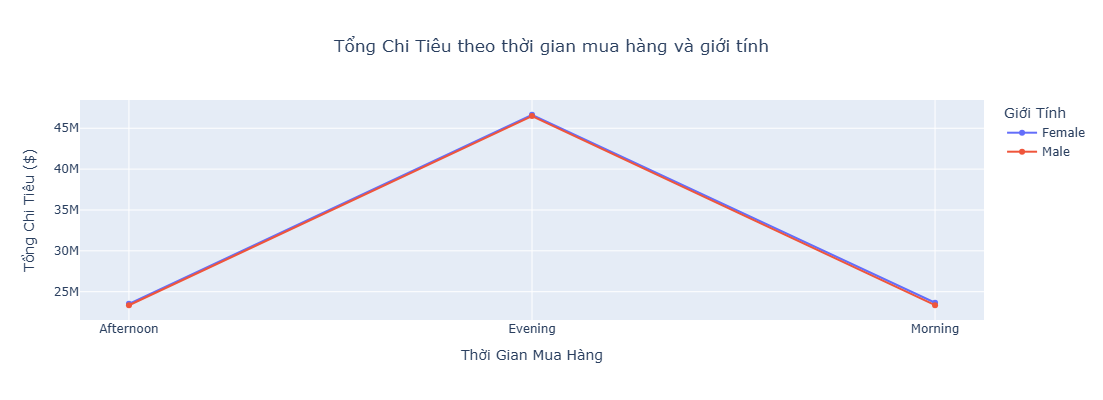

In [23]:
#phân tích tổng chi tiêu mua hàng theo thời gian mua hàng vào buổi sáng/chiều tối từ cột 'Purchase Date' và theo giới tính 'Gender' 
#LINECHART
import plotly.express as px
import pandas as pd

# Chuyển đổi 'Purchase Date' thành kiểu datetime nếu chưa phải
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M:%S')

# Tạo cột 'Time of Day' phân loại buổi sáng và chiều tối
def classify_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'  # Buổi sáng
    elif 12 <= hour < 18:
        return 'Afternoon'  # Buổi chiều
    else:
        return 'Evening'  # Buổi tối

# Áp dụng hàm để phân loại thời gian từ cột 'Purchase Date'
df['Time of Day'] = df['Purchase Date'].dt.hour.apply(classify_time_of_day)

# Nhóm dữ liệu theo giới tính và phân loại thời gian, tính tổng chi tiêu
time_gender_spending = df.groupby(['Gender', 'Time of Day']).agg({'Total Spending': 'sum', 'Purchase Date': 'count'}).reset_index()

# Vẽ biểu đồ đường theo thời gian và giới tính
fig13 = px.line(time_gender_spending, 
             x='Time of Day', 
             y='Total Spending',  # Hoặc 'Purchase Count' nếu bạn phân tích số lượng mua hàng
             color='Gender', 
             title='Tổng Chi Tiêu theo thời gian mua hàng và giới tính',
             labels={'Total Spending': 'Tổng Chi Tiêu ($)', 'Time of Day': 'Thời Gian Mua Hàng', 'Gender': 'Giới Tính'},
             markers=True  # Thêm các điểm đánh dấu trên đường
)

# Cập nhật layout cho biểu đồ
fig13.update_layout(
    xaxis_title='Thời Gian Mua Hàng', 
    yaxis_title='Tổng Chi Tiêu ($)', 
    title={'x': 0.5, 'y': 0.9}, 
    height=400, 
    showlegend=True
)

# Hiển thị biểu đồ
fig13.show()


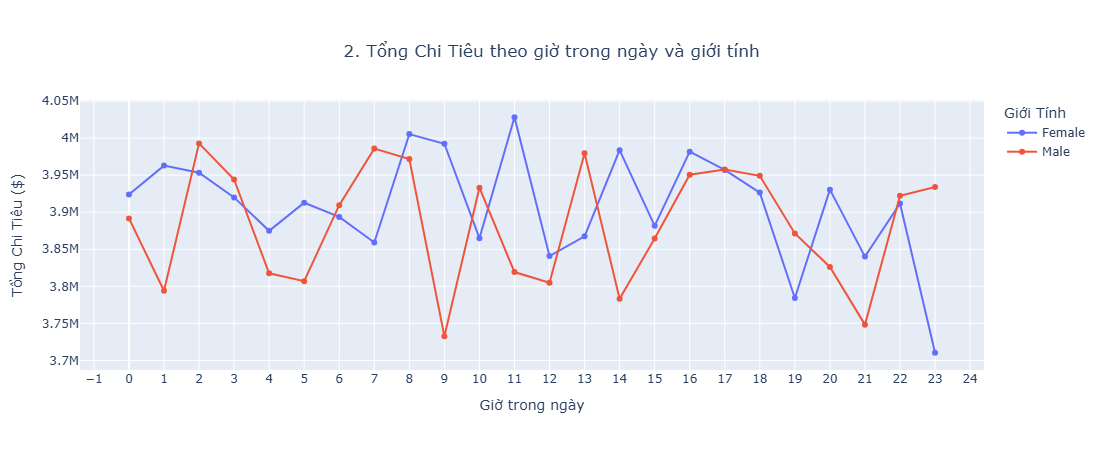

In [25]:
#phân tích tổng chi tiêu mua hàng theo thời gian mua hàng theo giờ(HOUR) từ cột 'Purchase Date' và theo giới tính 'Gender' 
#LINECHART
import pandas as pd
import plotly.express as px

# Chuyển đổi 'Purchase Date' thành kiểu datetime nếu chưa phải
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M:%S')

# Trích xuất giờ từ cột 'Purchase Date'
df['Hour'] = df['Purchase Date'].dt.hour

# Nhóm dữ liệu theo giới tính và giờ
hour_gender_spending = df.groupby(['Gender', 'Hour']).agg({'Total Spending': 'sum', 'Purchase Date': 'count'}).reset_index()

# Vẽ biểu đồ line chart
fig14_line = px.line(hour_gender_spending, 
              x='Hour', 
              y='Total Spending',  # Hoặc 'Transaction Count' nếu phân tích số lượng giao dịch
              color='Gender', 
              title='2. Tổng Chi Tiêu theo giờ trong ngày và giới tính',
              labels={'Hour': 'Giờ trong ngày', 'Total Spending': 'Tổng Chi Tiêu ($)', 'Gender': 'Giới Tính'},
              markers=True)  # Thêm điểm đánh dấu trên đường tại mỗi giờ

# Cập nhật layout của biểu đồ
fig14_line.update_layout(
    xaxis_title='Giờ trong ngày', 
    yaxis_title='Tổng Chi Tiêu ($)', 
    title={'x': 0.5, 'y': 0.9}, 
    height=450,
    showlegend=True,
    xaxis=dict(tickmode='linear', tick0=0, dtick=1)  # Hiển thị tất cả các giờ từ 0-23
)

# Hiển thị biểu đồ
fig14_line.show()
#Biểu đồ line chart sẽ hiển thị xu hướng chi tiêu theo giờ trong ngày, 
#cho phép bạn dễ dàng so sánh giữa các giới tính để tìm ra giờ cao điểm 
#hoặc sự khác biệt giữa thói quen mua sắm của nam và nữ.

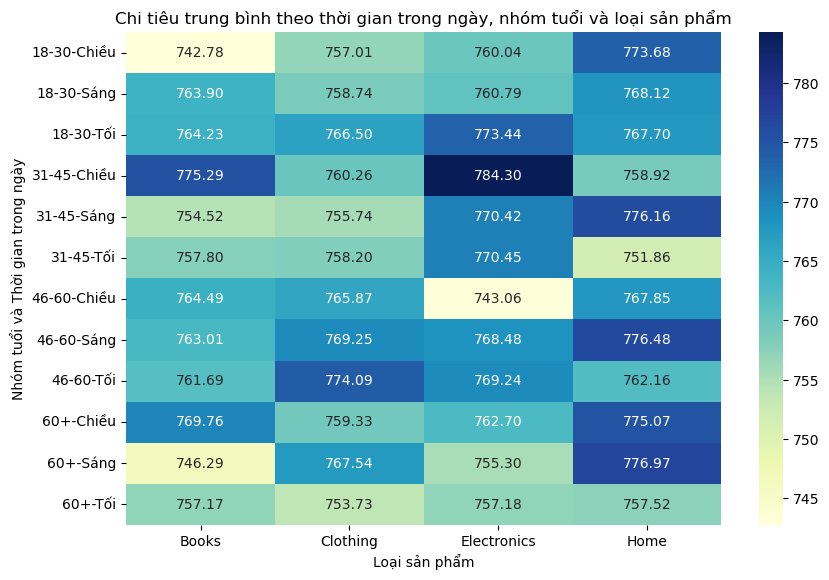

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo rằng cột 'Purchase Date' có định dạng datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M:%S')

# Tạo cột thời gian trong ngày (sáng, chiều, tối)
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Sáng'
    elif 12 <= hour < 18:
        return 'Chiều'
    else:
        return 'Tối'

df['Time of Day'] = df['Purchase Date'].dt.hour.apply(get_time_of_day)

# Tạo cột nhóm tuổi
def get_age_group(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 31 <= age <= 45:
        return '31-45'
    elif 46 <= age <= 60:
        return '46-60'
    else:
        return '60+'

df['Age Group'] = df['Customer Age'].apply(get_age_group)

# 2. Tính chi tiêu trung bình theo nhóm tuổi, thời gian trong ngày và loại sản phẩm
avg_spending = df.groupby(['Age Group', 'Time of Day', 'Product Category'])['Total Spending'].mean().unstack(level=2)

# Kiểm tra dữ liệu
#print(avg_spending)
# Vẽ biểu đồ heatmap cho chi tiêu trung bình theo nhóm tuổi và thời gian trong ngày
plt.figure(figsize=(12 * 0.80, 8 * 0.80))  # Điều chỉnh kích thước của biểu đồ

sns.heatmap(avg_spending, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)

# Tinh chỉnh biểu đồ
plt.title('Chi tiêu trung bình theo thời gian trong ngày, nhóm tuổi và loại sản phẩm')
plt.xlabel('Loại sản phẩm')
plt.ylabel('Nhóm tuổi và Thời gian trong ngày')

# Hiển thị biểu đồ
plt.show()